# Non-payment of water bills Analysis

The notebook will go through the following steps:
    1. Import Dataset
    2. Analyze the Data
    3. Prepare the data model building
    4. Split data in test and train data
    5. Train model using various machine learning algorithms for binary classification
    6. Evaluate the models
    7. Select the model best fit for the given data set
 

In [1]:
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
import json

## Importing of Dataset

In [3]:
# importing of data
df_data_X = pd.read_csv("/home/nicholas/msdatascience/msc_project/newdataset_.csv")

# make sure you assign the dataframe to the variable "df"
df = df_data_X
print (df.shape)

(1243, 12)


Examine the first 5 lines of the input

In [4]:
df.head()

,Cust ID,Cust Status,Category,Total billeld on actual,Total billed on estimate,Last bill type,billing tickets closed,Billing tickets in-progress,Other tickets closed,Other tickets in-progress,Avg time to close a tickets,Paid
0,10001,ACTIVE,Domestic,4,1,ACTUAL,2,2,1,0,8,Yes
1,10002,ACTIVE,Domestic,0,6,ESTIMATE,0,1,2,1,9,Yes
2,10003,DISCONNECTED,Domestic,8,1,ACTUAL,1,2,1,1,8,No
3,10004,ACTIVE,Domestic,9,1,ACTUAL,0,3,4,2,1,No
4,10005,ACTIVE,Domestic,9,4,ACTUAL,1,0,4,1,1,Yes


/home/nicholas/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

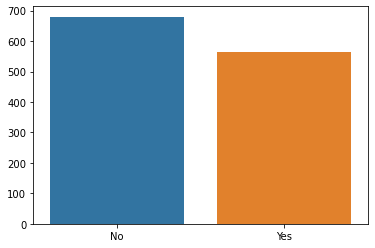

In [5]:
y = df["Paid"].value_counts()
sns.barplot(y.index, y.values)

In [6]:
y_True = df["Paid"][df["Paid"] == True]
print ("Default Percentage = "+str( (y_True.shape[0] / df["Paid"].shape[0]) * 100 ))

Default Percentage = 0.0


## Descriptive Analysis of the Data

In [7]:
  df.describe()

,Cust ID,Total billeld on actual,Total billed on estimate,billing tickets closed,Billing tickets in-progress,Other tickets closed,Other tickets in-progress,Avg time to close a tickets
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,10622.000000,6.205953,4.151247,1.565567,1.513274,2.548673,1.000000,12.847144
std,358.967501,5.509710,5.628571,1.284557,1.120203,1.709546,0.802572,7.204230
min,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,10311.500000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,7.000000
50%,10622.000000,5.000000,3.000000,2.000000,2.000000,3.000000,1.000000,12.000000
75%,10932.500000,9.000000,4.000000,2.000000,3.000000,4.000000,2.000000,19.000000
max,11243.000000,27.000000,27.000000,10.000000,3.000000,5.000000,2.000000,30.000000


### Default by Cust Status 

<AxesSubplot:xlabel='Cust Status'>

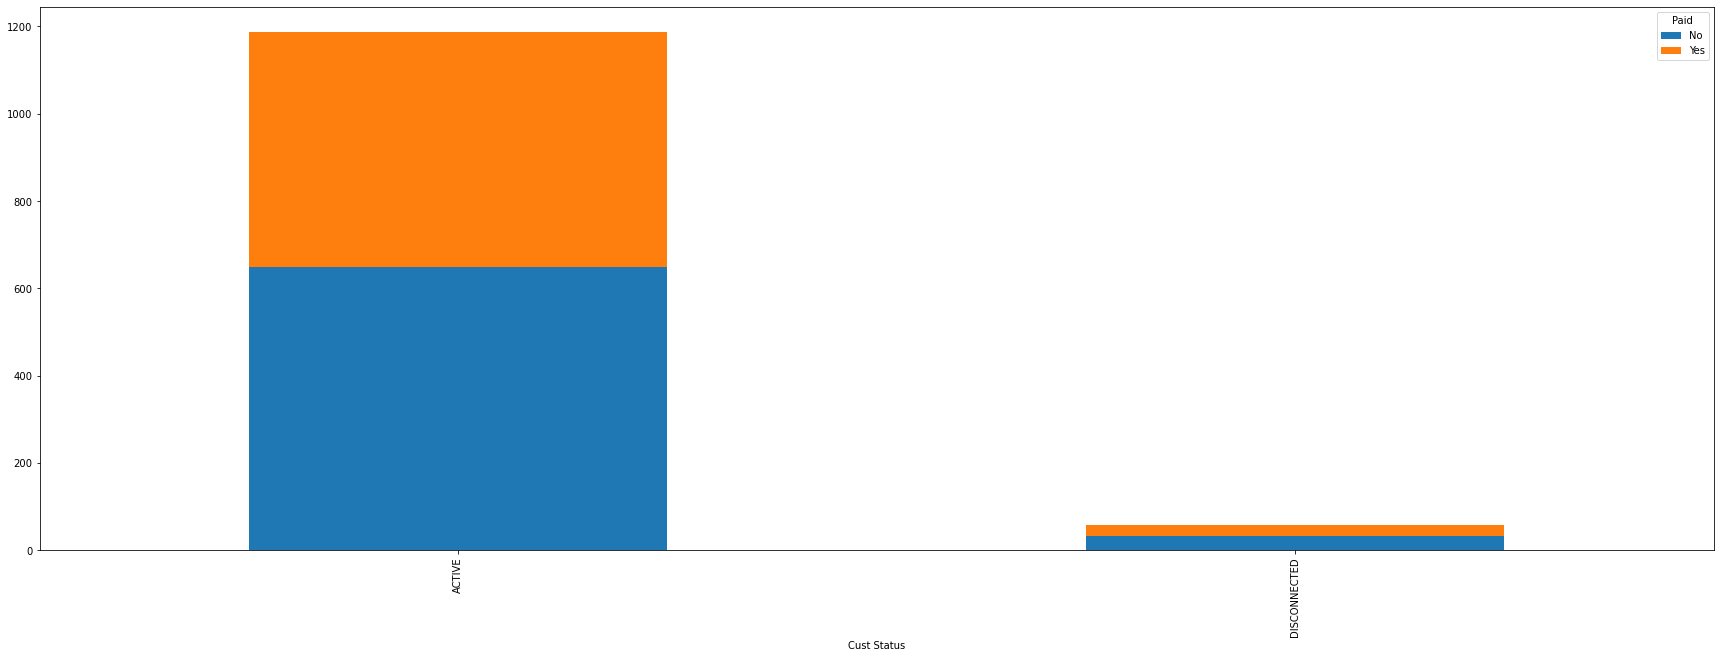

In [8]:
df.groupby(["Cust Status", "Paid"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

### Default by Category

<AxesSubplot:xlabel='Category'>

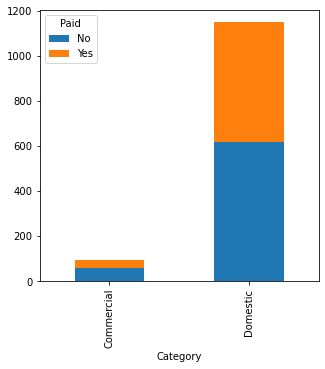

In [9]:
df.groupby(["Category", "Paid"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Default by Last bill type

<AxesSubplot:xlabel='Last bill type'>

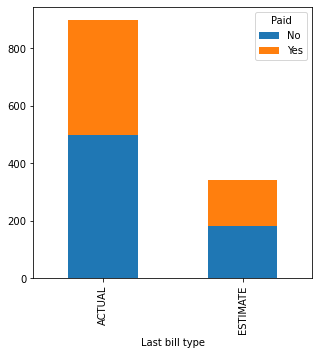

In [10]:
df.groupby(["Last bill type", "Paid"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

## Data Preparation

The following preprocessing steps need to be done:
1. Turn categorical variables into discrete numerical variables
2. Create response vector
3. Drop superflous columns
4. Build feature matrix
5. Standardize feature matrix values

### Encode categorical columns

In [11]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

# Cust Status, Category,Last bill type and Paid are strings and we want discreet integer values
df['Paid'] = label_encoder.fit_transform(df['Paid'])
df['Cust Status'] = label_encoder.fit_transform(df['Cust Status'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Last bill type'] = label_encoder.fit_transform(df['Last bill type'])
print (df.dtypes)

Cust ID                         int64
Cust Status                     int64
Category                        int64
Total billeld on actual         int64
Total billed on estimate        int64
Last bill type                  int64
billing tickets closed          int64
Billing tickets in-progress     int64
Other tickets closed            int64
Other tickets in-progress       int64
Avg  time to close a tickets    int64
Paid                            int64
dtype: object


In [12]:
print (df.shape)
df.head()

(1243, 12)


,Cust ID,Cust Status,Category,Total billeld on actual,Total billed on estimate,Last bill type,billing tickets closed,Billing tickets in-progress,Other tickets closed,Other tickets in-progress,Avg time to close a tickets,Paid
0,10001,0,1,4,1,0,2,2,1,0,8,1
1,10002,0,1,0,6,1,0,1,2,1,9,1
2,10003,1,1,8,1,0,1,2,1,1,8,0
3,10004,0,1,9,1,0,0,3,4,2,1,0
4,10005,0,1,9,4,0,1,0,4,1,1,1


### Create response vector

In [13]:
y = df['Paid'].values.astype(np.int)
y.size

1243

### Drop superflous columns

In [14]:
# df = df.drop(["Id","Paid"], axis = 1, inplace=True)
df.drop(["Paid"], axis = 1, inplace=True)
df.head()

,Cust ID,Cust Status,Category,Total billeld on actual,Total billed on estimate,Last bill type,billing tickets closed,Billing tickets in-progress,Other tickets closed,Other tickets in-progress,Avg time to close a tickets
0,10001,0,1,4,1,0,2,2,1,0,8
1,10002,0,1,0,6,1,0,1,2,1,9
2,10003,1,1,8,1,0,1,2,1,1,8
3,10004,0,1,9,1,0,0,3,4,2,1
4,10005,0,1,9,4,0,1,0,4,1,1


### Build feature matrix

In [15]:
X = df.values.astype(np.int)
print(X)
X.shape

[[10001     0     1 ...     1     0     8]
 [10002     0     1 ...     2     1     9]
 [10003     1     1 ...     1     1     8]
 ...
 [11241     0     0 ...     0     2    20]
 [11242     0     0 ...     2     1    16]
 [11243     0     0 ...     3     2    12]]


(1243, 11)

### Standardize Feature Matrix values

In [16]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.73065792, -0.21922753,  0.28602495, ..., -0.90626144,
        -1.24649509, -0.67308996],
       [-1.72787103, -0.21922753,  0.28602495, ..., -0.32107548,
         0.        , -0.53422675],
       [-1.72508415,  4.56147098,  0.28602495, ..., -0.90626144,
         0.        , -0.67308996],
       ...,
       [ 1.72508415, -0.21922753, -3.49619854, ..., -1.4914474 ,
         1.24649509,  0.99326852],
       [ 1.72787103, -0.21922753, -3.49619854, ..., -0.32107548,
         0.        ,  0.43781569],
       [ 1.73065792, -0.21922753, -3.49619854, ...,  0.26411048,
         1.24649509, -0.11763713]])

This completes the data preparation steps.

## Split Train/Test Validation Data

We need to adopt Stratified Cross Validation - Since the Response values are not balanced

In [17]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X, y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

## Build Models and Train

We will build models using a variety of approaches to see how they compare:

In [18]:
# create classifiers
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier()


from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)

from sklearn.neighbors import KNeighborsClassifier
k_neighbors = KNeighborsClassifier()


from sklearn.tree import DecisionTreeClassifier
decission_tree = DecisionTreeClassifier()

In [19]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, gradient_boost))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, random_forest))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, k_neighbors))))
print('Decission tree:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, decission_tree))))

Gradient Boosting Classifier:  0.62
Random Forest Classifier:      0.56
K Nearest Neighbor Classifier: 0.47
Decission tree:           0.61


## Model Evaluation

We will now generate confusion matrices for the various models to analyze the prediction in more detail.

### Gradient Boosting Classifier

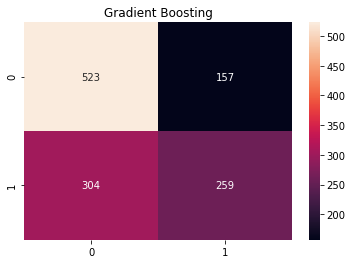

In [20]:
grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, gradient_boost))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

### Random Forest

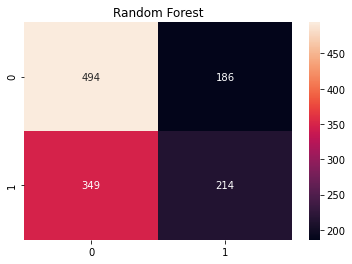

In [21]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, random_forest))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

## K-nearest Neighbors


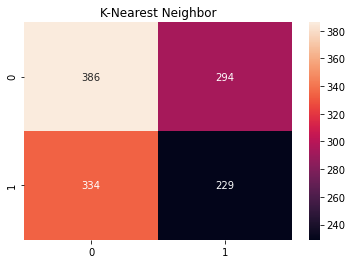

In [22]:
KNearest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, k_neighbors))
sns.heatmap(KNearest_conf_matrix, annot=True,  fmt='');
title = 'K-Nearest Neighbor'
plt.title(title);

## Decission Tree

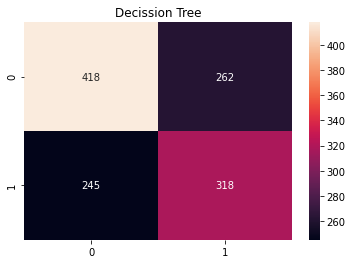

In [23]:
decission_tree_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, decission_tree))
sns.heatmap(decission_tree_conf_matrix, annot=True,  fmt='');
title = 'Decission Tree'
plt.title(title);

### Classification Report

In [24]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, gradient_boost))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, random_forest))))
print('K-nearest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, k_neighbors))))
print('Decission Tree Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, decission_tree))))


Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.64      0.76      0.69       680
           1       0.62      0.48      0.54       563

    accuracy                           0.63      1243
   macro avg       0.63      0.62      0.62      1243
weighted avg       0.63      0.63      0.63      1243


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.58      0.73      0.65       680
           1       0.53      0.37      0.44       563

    accuracy                           0.57      1243
   macro avg       0.56      0.55      0.54      1243
weighted avg       0.56      0.57      0.55      1243


K-nearest Classifier:
               precision    recall  f1-score   support

           0       0.54      0.57      0.56       680
           1       0.44      0.41      0.43       563

    accuracy                           0.50      1243
   macro avg       0.49      0.49      0.49  

## Final Model Selection

Gradient Boosting seems to do comparatively better for this case

In [25]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier()

[0.6655466  0.01429176 0.00354929 0.05955014 0.05909918 0.00327782
 0.02444665 0.03719002 0.01835156 0.02577549 0.08892149]


<AxesSubplot:>

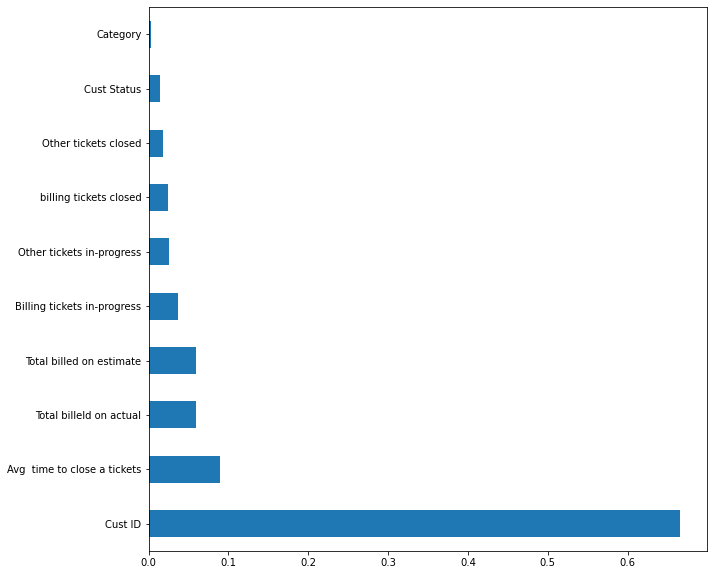

In [26]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(10)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

Feature: 0, Score: 0.66555
Feature: 1, Score: 0.01429
Feature: 2, Score: 0.00355
Feature: 3, Score: 0.05955
Feature: 4, Score: 0.05910
Feature: 5, Score: 0.00328
Feature: 6, Score: 0.02445
Feature: 7, Score: 0.03719
Feature: 8, Score: 0.01835
Feature: 9, Score: 0.02578
Feature: 10, Score: 0.08892


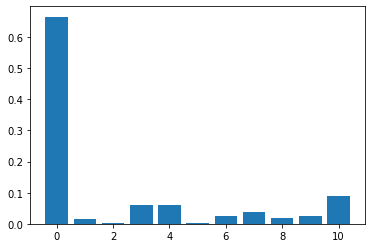

In [27]:
# get importance
importance = gbc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

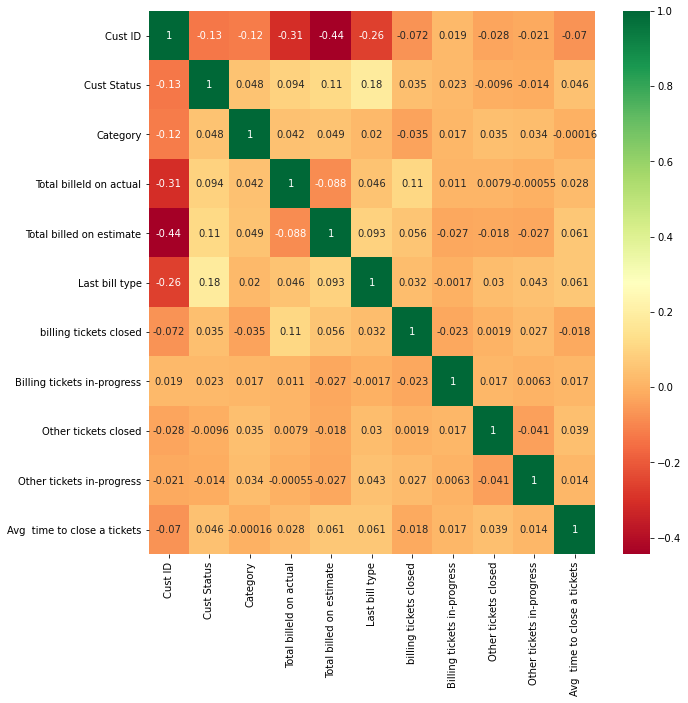

In [28]:
# Correlation Matrix with Heatmap
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")